In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt     
import random                       
from datetime import datetime

import tensorflow as tf

In [1]:
#I am commenting out seed since due to google colab's RAM issue, I ran the codes separately and did not apply seed for the first 2 questions
#Setting seed
#tf.random.set_seed(12345)
#tf.compat.v1.random.set_random_seed(12345)

In [3]:
# load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() 

#Since there are 50000 records to train and 10000 to test, reshaping data accordingly
x_train=x_train.reshape(50000,32,32,3) 
x_test=x_test.reshape(10000,32,32,3) 

x_train=x_train.astype('float32') 
x_test=x_test.astype('float32')

#Normalizing the train and test data for better output
x_train /=255 
x_test /=255
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


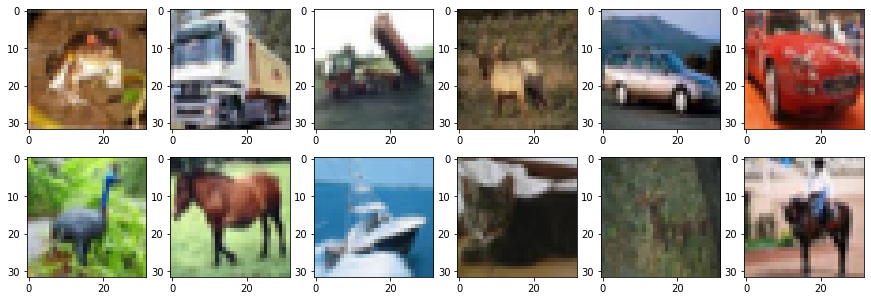

In [10]:
# Looking at samples from the data
from matplotlib.colors import Colormap
fig, axes = plt.subplots(nrows=2, ncols=6,figsize=(15,5))
ax = axes.ravel()
for i in range(12):
	ax[i].imshow(x_train[i])

plt.show()

In [ ]:
#Now, I will built the LetNet with seven layer output

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(6, (5, 5),strides=(1,1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(16, (5, 5),strides=(1,1), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(84))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(10)) # So that we can get results for 10 predicted classess
model.add(tf.keras.layers.Activation('softmax'))
opt_lr = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
model.build(input_shape=(128,32,32,3)) 
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (128, 32, 32, 6)          456       
                                                                 
 max_pooling2d (MaxPooling2D  (128, 16, 16, 6)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (128, 16, 16, 16)         2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (128, 8, 8, 16)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (128, 8, 8, 120)          48120     
                                                                 
 flatten (Flatten)           (128, 7680)               0

In [ ]:
#25 epochs according to instruction
model.fit(x_train, y_train,
          batch_size=128, epochs=25, verbose=1) 

Epoch 1/25
391/391 [==============================] - 11s 6ms/step - loss: 1.9592 - accuracy: 0.2980
Epoch 2/25
391/391 [==============================] - 2s 5ms/step - loss: 1.6584 - accuracy: 0.3980
Epoch 3/25
391/391 [==============================] - 2s 5ms/step - loss: 1.5685 - accuracy: 0.4373
Epoch 4/25
391/391 [==============================] - 2s 5ms/step - loss: 1.5120 - accuracy: 0.4547
Epoch 5/25
391/391 [==============================] - 2s 5ms/step - loss: 1.4605 - accuracy: 0.4780
Epoch 6/25
391/391 [==============================] - 2s 5ms/step - loss: 1.4218 - accuracy: 0.4924
Epoch 7/25
391/391 [==============================] - 2s 5ms/step - loss: 1.4038 - accuracy: 0.5025
Epoch 8/25
391/391 [==============================] - 2s 5ms/step - loss: 1.3618 - accuracy: 0.5122
Epoch 9/25
391/391 [==============================] - 2s 5ms/step - loss: 1.3427 - accuracy: 0.5233
Epoch 10/25
391/391 [==============================] - 2s 5ms/step - loss: 1.3026 - accuracy: 0.539

#Q1: Effect of different learning rates

[0.83113998 0.82929999 0.77345997 0.09796    0.0992    ]


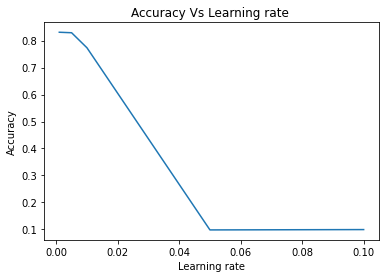

In [ ]:
#I will try 5 different learning rates
learningRate=[0.001, 0.005, 0.01, 0.05, 0.1]
acc=np.zeros(5)
for i in range(len(learningRate)):
    opt_lr = tf.keras.optimizers.Adam(learning_rate=learningRate[i]) 
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
    model.build(input_shape=(128,32,32,3)) 
    #model.summary() 
    accuracy= model.fit(x_train, y_train,
          batch_size=128, epochs=25,
          verbose=0) 
    acc[i]=accuracy.history['accuracy'][24]

#Plotting effect of learning rates
print(acc)
plt.plot(np.array(learningRate).reshape(5,1), np.array(acc).reshape(5,1))
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.title('Accuracy Vs Learning rate ')
plt.show()

#The lower learning rates, the better the performance. 0.001 comes out as best for the above model

#Q2: Testing effect of various batch sizes

[0.97228003 0.97104001 0.93273997 0.91813999 0.88884002]


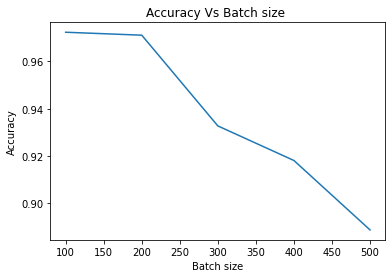

In [ ]:
#Learning rate of 0.001 has been used since performed best in the last code
batch=[100, 200, 300, 400, 500]
acc=np.zeros(5)
for i in range(len(batch)):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(6, (5, 5),strides=(1,1), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(16, (5, 5),strides=(1,1), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(84))
    model.add(tf.keras.layers.Activation('relu'))
    model.add(tf.keras.layers.Dense(10)) 
    model.add(tf.keras.layers.Activation('softmax'))
    opt_lr = tf.keras.optimizers.Adam(learning_rate=0.001) 
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
    model.build(input_shape=(128,32,32,3)) 
    #model.summary() 
    accuracy= model.fit(x_train, y_train,
          batch_size=batch[i], epochs=25,
          verbose=0) 
    acc[i]=accuracy.history['accuracy'][24]   #Since epoch=25, upto 24th value will be taken from 0th.

#Plotting
print(acc)
plt.plot(np.array(batch).reshape(5,1), np.array(acc).reshape(5,1))
plt.ylabel('Accuracy')
plt.xlabel('Batch size')
plt.title('Accuracy Vs Batch size ')
plt.show()

#The lower the batch size, the better the performance. Batch size of 100 comes out as best for the above model

#Q3: Finding out best combination of hyperparameters. Here, I will try adam and sgd as optimizers

## Picking fewer number of values for learning rate and bach sizes to avoid colab's RAM exceed isseu

In [ ]:
#Adam has been used
# Picking fewer values for learning rate and bach sizes to avoid colab's RAM exceed isseu
batch=[100]
learningRate=[0.001]

for i in range(len(batch)):
    for j in range(len(learningRate)):
      model = tf.keras.models.Sequential()
      model.add(tf.keras.layers.Conv2D(6, (5, 5),strides=(1,1), padding='same', activation='relu'))
      model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
      model.add(tf.keras.layers.Conv2D(16, (5, 5),strides=(1,1), padding='same', activation='relu'))
      model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
      model.add(tf.keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'))
      model.add(tf.keras.layers.Flatten())
      model.add(tf.keras.layers.Dense(84))
      model.add(tf.keras.layers.Activation('relu'))
      model.add(tf.keras.layers.Dense(10)) 
      model.add(tf.keras.layers.Activation('softmax'))
      opt_lr = tf.keras.optimizers.Adam(learning_rate=learningRate[j])
      model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
      model.build(input_shape=(128,32,32,3)) 
      #model.summary() 
      accuracy= model.fit(x_train, y_train,
          batch_size=batch[i], epochs=25, verbose=0) 
      print(i,j, accuracy.history['accuracy'][24])

0 0 0.9723799824714661


In [ ]:
#SGD has been used
# Picking fewer values for learning rate and bach sizes to avoid colab's RAM exceed isseu
batch=[100, 200, 300]
learningRate=[0.001]
for i in range(len(batch)):
    for j in range(len(learningRate)):
      model = tf.keras.models.Sequential()
      model.add(tf.keras.layers.Conv2D(6, (5, 5),strides=(1,1), padding='same', activation='relu'))
      model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
      model.add(tf.keras.layers.Conv2D(16, (5, 5),strides=(1,1), padding='same', activation='relu'))
      model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
      model.add(tf.keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'))
      model.add(tf.keras.layers.Flatten())
      model.add(tf.keras.layers.Dense(84))
      model.add(tf.keras.layers.Activation('relu'))
      model.add(tf.keras.layers.Dense(10)) 
      model.add(tf.keras.layers.Activation('softmax'))
      opt_lr = tf.keras.optimizers.SGD(learning_rate=learningRate[j])
      model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
      model.build(input_shape=(128,32,32,3)) 
      #model.summary() 
      accuracy= model.fit(x_train, y_train,
          batch_size=batch[i], epochs=25,
          verbose=0) 
      print(i,j,accuracy.history['accuracy'][24])

0 0 0.42673999071121216
1 0 0.3894999921321869
2 0 0.25883999466896057


#So 0.9723 was the best accuracy and I obtained it by using learning rate=0.001 , batch size=100 , optimizer=Adam 

#Q4: Building feed forward network with each hidden layer containing the same number of neurons as the number of filters in each convolution layer. Epoch=25, optimizer=adam

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(456))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(2416))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(48120))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))
model.build(input_shape=(128, 32,32,3))
model.summary()
opt_lr = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128, epochs=25,
          verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (128, 3072)               0         
                                                                 
 dense (Dense)               (128, 456)                1401288   
                                                                 
 activation (Activation)     (128, 456)                0         
                                                                 
 dense_1 (Dense)             (128, 2416)               1104112   
                                                                 
 activation_1 (Activation)   (128, 2416)               0         
                                                                 
 dense_2 (Dense)             (128, 48120)              116306040 
                                                                 
 activation_2 (Activation)   (128, 48120)              0

#a) The performance here is not good enough, below 0.6 accuracy; while LeNet shows more than 0.97 accuracy with optimal hyperparameters and higher than 0.6 accuracy without hyperparameter tuning.
#b) For the first LeNet model, total number of parameters was 983,726. Feed forward model has 119,292,659 total parameters, which is more than 1000 higher than LeNet model. So, it was not worth of it since model became too much complex and this higher number could not generate better result. Note: Accuracy could be done on test data. But Google Colab was giving issue due to its new policy and it hindered me from running more code. Also Professor knows this.